In [1]:
import resources
import matplotlib.pyplot as plt
from pathlib import Path
from nptdms import TdmsFile
import numpy as np

%matplotlib inline

In [2]:
def readAE(path):
    """
    Read AE data from TDMS file and scale.

    Args:
        fno: TDMS file number to read into memory.

    Returns:
        data: AE data from the TDMS file.

    """
    test = TdmsFile.read(path)
    prop = test.properties
    data = []
    for group in test.groups():
        for channel in group.channels():
            data = channel[:]
    if not data.dtype == float:
        data = (data.astype(np.float64) * prop.get('Gain')) + prop.get(
            'Offset'
        )
    # Pre-Amp 20dB gain 
    data = data * 10
    return data

In [3]:
AEFolder= Path.home() / r'OneDrive - Cardiff University\Documents\PHD\AE\Testing\24_05_30_PreAmpTest'
assert AEFolder.exists()
AEFiles = list(Path.glob(AEFolder, '*MHz.tdms'))
assert len(AEFiles) > 0

for f in AEFiles:
    print(f.stem)

2024_05_30_10_21_51-Ch1-2MHz
2024_05_30_10_22_27-Ch1-2MHz
2024_05_30_10_34_21-Ch1-2MHz
2024_05_30_10_45_32-Ch1-2MHz
2024_05_30_10_48_49-Ch1-2MHz
2024_05_30_10_52_40-Ch1-2MHz
2024_05_30_10_55_57-Ch1-2MHz
2024_05_30_10_59_13-Ch1-2MHz
2024_05_30_11_03_19-Ch1-2MHz
2024_05_30_11_06_38-Ch1-2MHz


In [4]:
FS = 2_000_000

def plotAE(signal, FS):
    if isinstance(signal, Path):
        signal = readAE(signal)

    ts = 1 / FS
    n = len(signal)
    t = np.arange(0, n) * ts

    fig, ax = plt.subplots()
    ax.plot(t, signal)
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Voltage (V)')
    return fig, ax

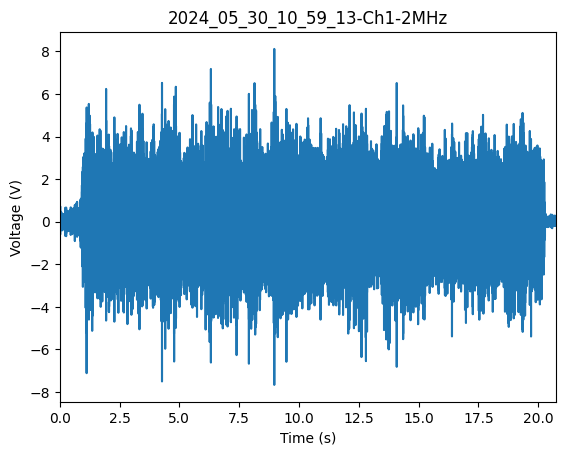

In [8]:
f = AEFiles[7]
fig, ax = plotAE(f, FS)
ax.set_title(f.stem)
plt.show()